## Análisis Exploratorio de Datos

Librerias

In [8]:
import re
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import csv
import seaborn as sns

In [4]:
# Leemos el Dataset limpio creado en el ETL donde unimos y organizamos de la data homicidios las hojas hechos y victimas

df = pd.read_csv(r"C:\Users\ayrc2\Documentos\Proyecto Individual DPT03\PI_02_DA_SINIESTROS_VIALES\PI_02_DA_Siniestros_Viales\Data\siniestros_ok.csv")
df.head()

,Id,Fecha,Año,Mes,Día,Día semana,Hora completa,Hora,Num víctimas,Participantes,...,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,Xy (caba),Coordenada x,Coordenada y,Pos x,Pos y
0,2016-0001,2016-01-01,2016.0,1.0,1.0,Viernes,04:00:00,4.0,1,MOTO-AUTO,...,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8.0,Point (98896.78238426 93532.43437792),98896.782384,93532.434378,-58.475340,-34.687570
1,2016-0002,2016-01-02,2016.0,1.0,2.0,Sabado,01:15:00,1.0,1,AUTO-PASAJEROS,...,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9.0,Point (95832.05571093 95505.41641999),95832.055711,95505.416420,-58.508775,-34.669777
2,2016-0003,2016-01-03,2016.0,1.0,3.0,Domingo,07:00:00,7.0,1,MOTO-AUTO,...,AVENIDA,ENTRE RIOS AV.,NaN,ENTRE RIOS AV. 2034,1.0,Point (106684.29090040 99706.57687843),106684.290900,99706.576878,-58.390403,-34.631894
3,2016-0004,2016-01-10,2016.0,1.0,10.0,Domingo,00:00:00,0.0,1,MOTO-SD,...,AVENIDA,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8.0,Point (99840.65224780 94269.16534422),99840.652248,94269.165344,-58.465039,-34.680930
4,2016-0005,2016-01-21,2016.0,1.0,21.0,Jueves,05:20:00,5.0,1,MOTO-PASAJEROS,...,AVENIDA,SAN JUAN AV.,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1.0,Point (106980.32827929 100752.16915795),106980.328279,100752.169158,-58.387183,-34.622466


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     717 non-null    object 
 1   Fecha                  702 non-null    object 
 2   Año                    702 non-null    float64
 3   Mes                    702 non-null    float64
 4   Día                    702 non-null    float64
 5   Día semana             702 non-null    object 
 6   Hora completa          702 non-null    object 
 7   Hora                   701 non-null    float64
 8   Num víctimas           717 non-null    int64  
 9   Participantes          702 non-null    object 
 10  Rol                    717 non-null    object 
 11  Acusado                702 non-null    object 
 12  Victima                702 non-null    object 
 13  Sexo                   717 non-null    object 
 14  Edad                   717 non-null    int64  
 15  Rango_

In [7]:
df.describe()

,Año,Mes,Día,Hora,Num víctimas,Edad,Comuna,Coordenada x,Coordenada y,Pos x,Pos y
count,702.000000,702.000000,702.000000,701.000000,717.000000,717.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,2018.192308,6.693732,15.927350,11.573466,1.037657,39.050209,7.428775,101980.113004,101070.596233,-58.441710,-34.619609
std,1.669154,3.584551,8.657478,6.667562,0.294226,22.010669,4.378970,4253.717694,3914.938863,0.046383,0.035291
min,2016.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,93889.867899,91571.233073,-58.529942,-34.705250
25%,2017.000000,3.250000,9.000000,6.000000,1.000000,24.000000,4.000000,98744.378735,98387.965943,-58.476995,-34.643801
50%,2018.000000,7.000000,16.000000,11.000000,1.000000,35.000000,8.000000,101721.590022,100711.696729,-58.444513,-34.622835
75%,2019.000000,10.000000,23.000000,17.000000,1.000000,55.000000,11.000000,105630.884244,103582.742374,-58.401892,-34.596969
max,2021.000000,12.000000,31.000000,23.000000,3.000000,95.000000,15.000000,109831.098614,110496.053085,-58.356082,-34.534654


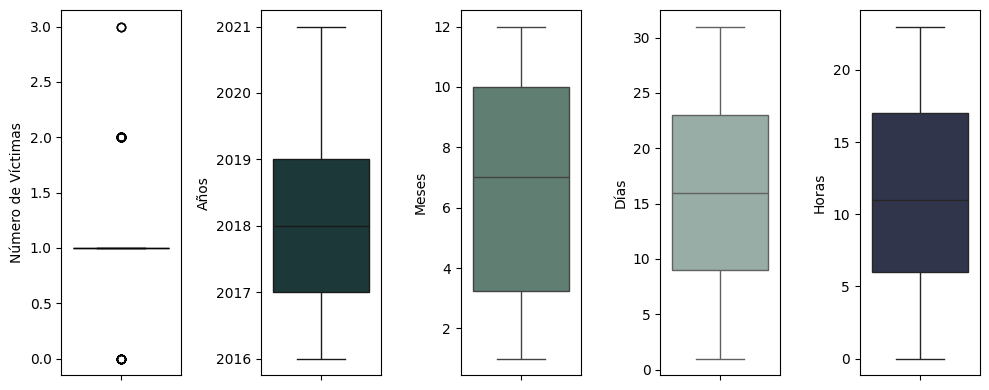

In [10]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 4))

# Crear subplots para los gráficos 
plt.subplot(1, 5, 1) 
sns.boxplot(data=df, y='Num víctimas', color = "#040D12")
plt.ylabel('Número de Víctimas')

plt.subplot(1, 5, 2) 
sns.boxplot(data=df, y='Año', color = "#183D3D")
plt.ylabel('Años')

plt.subplot(1, 5, 3) 
sns.boxplot(data=df, y='Mes', color = "#5C8374")
plt.ylabel('Meses')

plt.subplot(1, 5, 4) 
sns.boxplot(data=df, y='Día', color = "#93B1A6")
plt.ylabel('Días')

plt.subplot(1, 5, 5) 
sns.boxplot(data=df, y='Hora', color = "#2D3250")
plt.ylabel('Horas')

# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()

Se evidencia que el # de victimas esta con valores unicos de 0, 2 o 3 el resto de variables si presentan concentración donde el Año es del 2017 al 2019, los meses que mas presentan datos finales de Marzo a Octubre, ños dias del 9 al 23 y en horas de 6 am a 6 pm aproximadamente.

#### ANALIZAMOS LA VARIABLE VICTIMAS

##### victimas por mes

C:\Users\ayrc2\AppData\Local\Temp\ipykernel_14512\1317087054.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Mes', y='Num víctimas', data=data, palette="ocean")


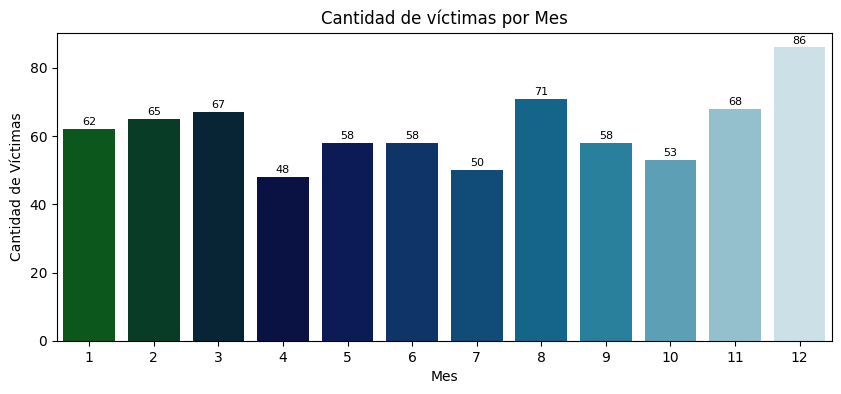

In [66]:
# Se agrupa por la cantidad de víctimas por mes
data = df.groupby(['Mes'])['Num víctimas'].sum().reset_index()
data["Mes"]=data["Mes"].astype("Int64")

# Se grafica
plt.figure(figsize=(10,4))

ax = sns.barplot(x='Mes', y='Num víctimas', data=data, palette="ocean")
ax.set_title('Cantidad de víctimas por Mes')
ax.set_xlabel('Mes') ; ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Se muestra el gráfico
plt.show()

Evidenciamos que el mes con mayor cantidad de victimas es Diciembre, tal vez influya que es mes de vacaciones y es cuando mas se movilizan las personas en sus vehiculos

##### Victimas por Año

C:\Users\ayrc2\AppData\Local\Temp\ipykernel_14512\3888134409.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Año', y='Num víctimas', data=data, palette="ocean")


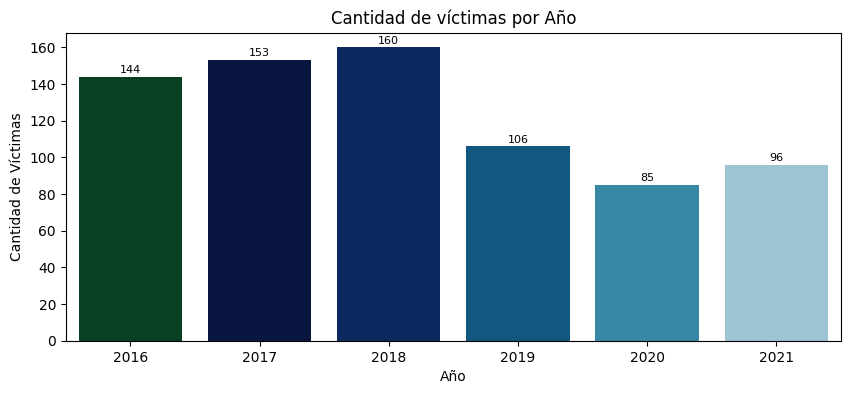

In [67]:
# Se agrupa por la cantidad de víctimas por mes
data = df.groupby(['Año'])['Num víctimas'].sum().reset_index()
data["Año"]=data["Año"].astype("Int64")

# Se grafica
plt.figure(figsize=(10,4))

ax = sns.barplot(x='Año', y='Num víctimas', data=data, palette="ocean")
ax.set_title('Cantidad de víctimas por Año')
ax.set_xlabel('Año') ; ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Se muestra el gráfico
plt.show()

Evidenciamos que el año com mas victimas fue el 2018 con 160 casos, mientras que el menor año es el 2020 tal vez por el confinamiento que hubo por el Covid_19

##### Victimas por Dia del Mes

C:\Users\ayrc2\AppData\Local\Temp\ipykernel_14512\215415490.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Día', y='Num víctimas', data=data, palette="ocean")


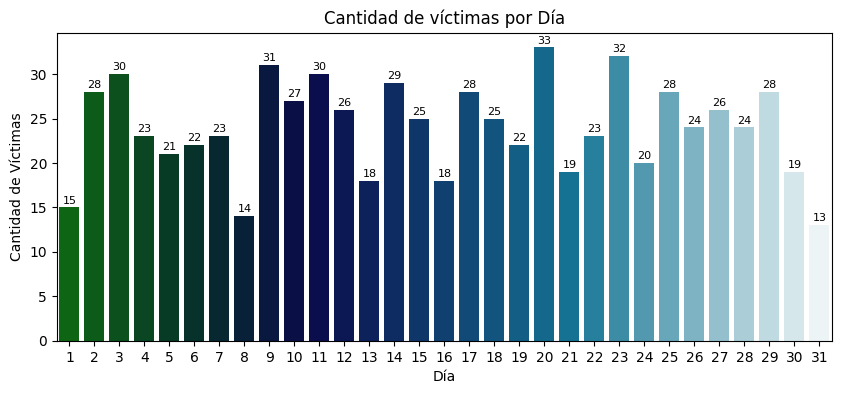

In [68]:
# Se agrupa por la cantidad de víctimas por mes
data = df.groupby(['Día'])['Num víctimas'].sum().reset_index()
data["Día"]=data["Día"].astype("Int64")

# Se grafica
plt.figure(figsize=(10,4))

ax = sns.barplot(x='Día', y='Num víctimas', data=data, palette="ocean")
ax.set_title('Cantidad de víctimas por Día')
ax.set_xlabel('Día') ; ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Se muestra el gráfico
plt.show()

Evidenciamos que el dia del mes con mas victimas es el dia 20 con un total de 33 Victimas

##### Concluciones:
* Evidenciamos que el año com mas victimas fue el 2018 con 160 casos, mientras que el menor año es el 2020 tal vez por el confinamiento que hubo por el Covid_19
* Evidenciamos que el mes con mayor cantidad de victimas es Diciembre, tal vez influya que es mes de vacaciones y es cuando mas se movilizan las personas en sus vehiculos
* Evidenciamos que el dia del mes con mas victimas es el dia 20 con un total de 33 Victimas

### Edades de las Victimas

In [31]:
df["Edad"].describe()

count    717.000000
mean      39.050209
std       22.010669
min        0.000000
25%       24.000000
50%       35.000000
75%       55.000000
max       95.000000
Name: Edad, dtype: float64

Con el Describe podemos visualizar que la media o promedio de edad de las victimas es de 39 años

Text(0, 0.5, 'Edad')

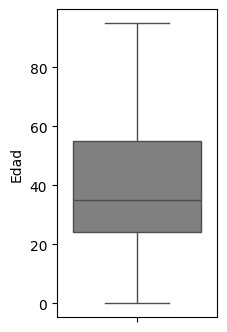

In [46]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(12, 4))

# Crear subplots para los gráficos 
plt.subplot(1, 5, 1) 
sns.boxplot(data=df, y='Edad', color = "Grey")
plt.ylabel('Edad')

Con el Boxplot evidenciamos que la media definitivamente si se encuentra en victimas de 39 años

##### Edad de las victimas por año

C:\Users\ayrc2\AppData\Local\Temp\ipykernel_14512\3274305559.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Año', y='Edad', data=df, palette="grey")


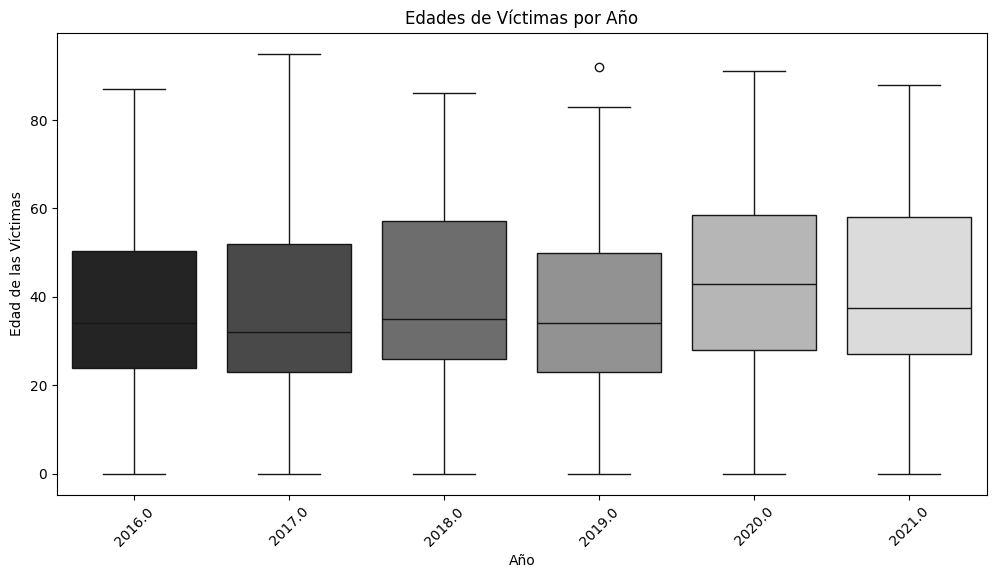

In [48]:
#Agrupa los datos en cantidad de victimas por edad y  año
data = df.groupby(['Edad', "Año"])['Num víctimas'].sum().reset_index()


#Se crea el gráfico de boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Año', y='Edad', data=df, palette="grey")

plt.title('Edades de Víctimas por Año') ; plt.xlabel('Año') ; plt.ylabel('Edad de las Víctimas')
# Cambia el formato de las etiquetas del eje x a enteros
plt.xticks(rotation=45)
# Se muestra el gráfico
plt.show()

Evidenciamos que el promedio de 39 años que traiamos en los graficos anteriores de mantiene a excepcion del año 2020 supera el promedio, aunque recordemos que el año 2020 es el que menos victimas tiene.

##### Analisis de Acusados

C:\Users\ayrc2\AppData\Local\Temp\ipykernel_14512\3425143535.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(df, x="Acusado", palette="ocean")


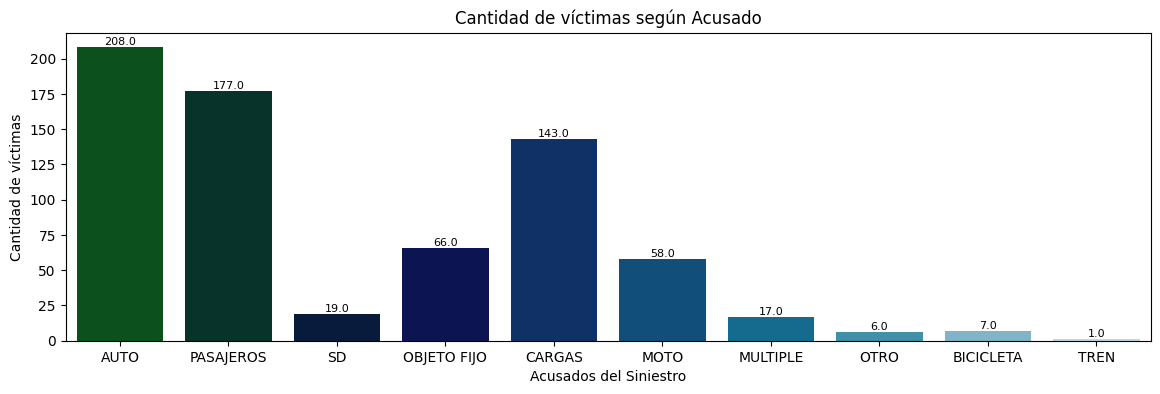

In [69]:
#Se crea el gráfico de barras
plt.figure(figsize=(14, 4))

ax=sns.countplot(df, x="Acusado", palette="ocean")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)


#Se titulan los ejes
plt.xlabel('Acusados del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas según Acusado')

plt.show()

Vemos que Auto es el vehiculo que mas ocupaban los acusados del siniestro vial con un total de 208 acusados.

##### Analisis de Victimas

C:\Users\ayrc2\AppData\Local\Temp\ipykernel_14512\30944660.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(df, x="Victima", palette="ocean")


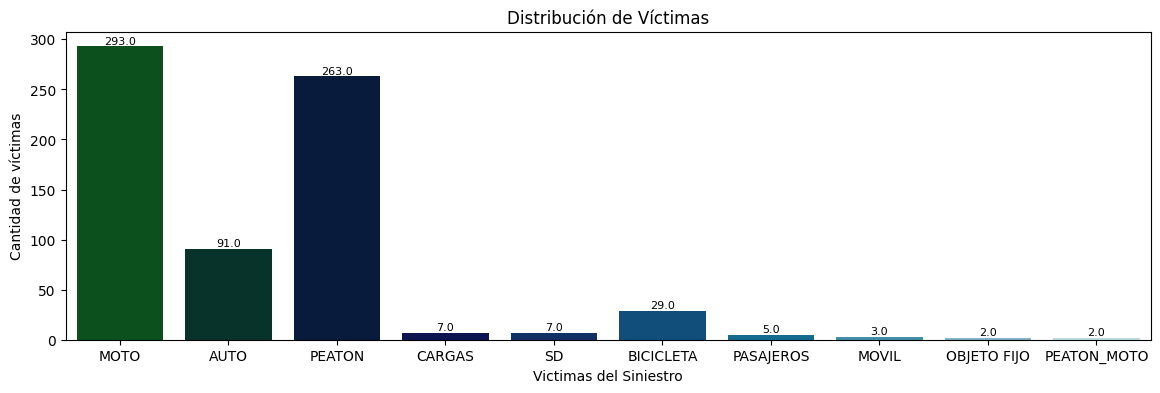

In [70]:
#Se crea el gráfico de barras
plt.figure(figsize=(14, 4))

ax=sns.countplot(df, x="Victima", palette="ocean")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)


#Se titulan los ejes
plt.xlabel('Victimas del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Distribución de Víctimas')

plt.show()

Vemos que el vehiculo que mas ocupaban las personas que fallecieron o resultaron heridas durante el hecho fueron las Motos con un total de 293 victimas, seguida de peatones y por ultimo autos.

##### Distribuucion de victimas por Sexo

Text(0.5, 1.0, 'ProporcDistribuciónn de Víctimas por Sexo')

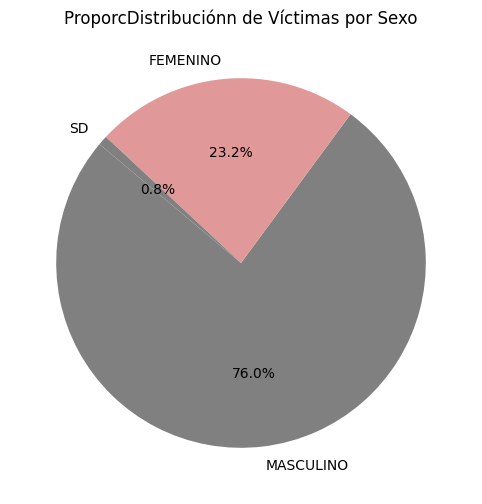

In [62]:
# Calcular la proporción de víctimas por sexo
proporcion = df['Sexo'].value_counts(normalize=True) * 100

# Preparar los datos para el gráfico de torta
labels = proporcion.index
sizes = proporcion.values

# Crear el gráfico de torta
plt.figure(figsize=(12, 6))

# Gráfico de torta

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['grey', '#E19898'])
plt.title('Distribuciónn de Víctimas por Sexo')

Según la distribucion la mayor cantidad de victimas son de genero masculino ocupando un 76% del total de las victimas 